<a href="https://colab.research.google.com/github/muhammed-shamil/RNN-2/blob/main/milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data science /Deep Learning /RNN/monthly_milk_production.csv',index_col='Date',parse_dates=True)

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


<Axes: xlabel='Date'>

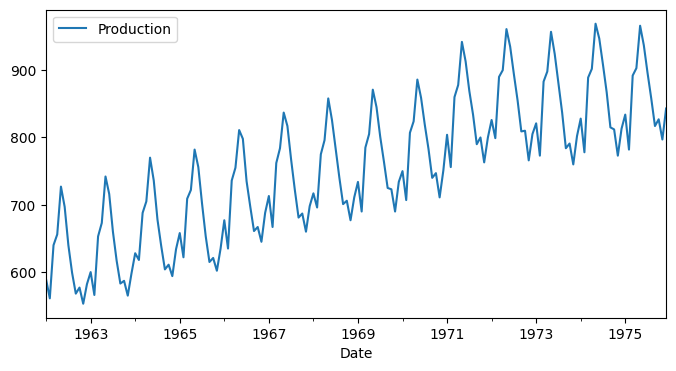

In [6]:
df.plot(figsize=(8,4))

In [7]:
len(df)

168

In [8]:
train = df.iloc[:158]
test = df.iloc[158:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled_train = scalar.fit_transform(train)
scaled_test = scalar.fit_transform(test)

In [10]:
scaled_train[-12:]

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [11]:
scaled_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size = 1)

In [14]:
x,y = generator[1]
print(f'Given the Array: /n{x.flatten()}')
print(f'predict this y: /n {y}')

Given the Array: /n[0.01923077 0.20913462 0.24759615]
predict this y: /n [[0.41826923]]


In [15]:
x.shape

(1, 3, 1)

In [16]:
#we do same thing,but now instead of 12 month
n_inputs = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_inputs,batch_size=1)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [18]:
model = Sequential()
model.add(LSTM(100, activation='relu',input_shape=(n_inputs,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss='mse')

In [19]:
model.fit(generator,epochs = 50 ,batch_size=1)

Epoch 1/50
146/146 [==============================] - 3s 6ms/step - loss: 0.0477
Epoch 2/50
146/146 [==============================] - 1s 7ms/step - loss: 0.0257
Epoch 3/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0185
Epoch 4/50
146/146 [==============================] - 1s 7ms/step - loss: 0.0144
Epoch 5/50
146/146 [==============================] - 2s 11ms/step - loss: 0.0138
Epoch 6/50
146/146 [==============================] - 2s 15ms/step - loss: 0.0104
Epoch 7/50
146/146 [==============================] - 1s 10ms/step - loss: 0.0056
Epoch 8/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0059
Epoch 9/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0043
Epoch 10/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0048
Epoch 11/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0043
Epoch 12/50
146/146 [==============================] - 1s 6ms/step - loss: 0.0034
Epoch 13/50
146/146 [=

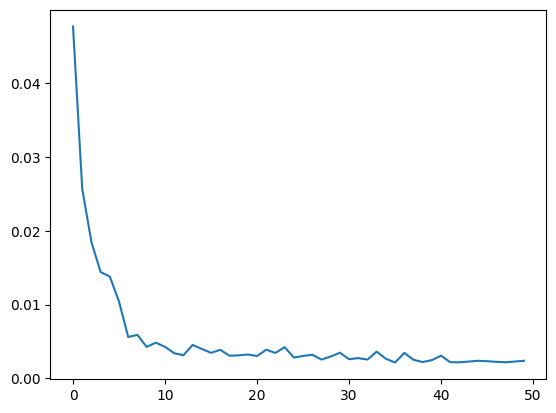

In [20]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [21]:
last_train_batch = scaled_train[-12:]

In [22]:
last_train_batch

array([[0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ],
       [0.67548077],
       [0.55048077]])

In [23]:
last_train_batch = last_train_batch.reshape(1,n_inputs,n_features)

In [24]:
pred = model.predict(last_train_batch)

1/1 [==============================] - 0s 209ms/step


In [25]:
pred

array([[0.81965524]], dtype=float32)

In [26]:
test

,Production
Date,
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797


In [27]:
true_prediction = scalar.inverse_transform(pred)
true_prediction

array([[935.5217]], dtype=float32)

In [28]:
scaled_test

array([[0.56213018],
       [0.62721893],
       [1.        ],
       [0.82840237],
       [0.58579882],
       [0.36094675],
       [0.1183432 ],
       [0.17751479],
       [0.        ],
       [0.27218935]])

In [29]:
test_predictions = []

In [30]:
first_eval_batch = scaled_train[-n_inputs:]
current_batch = first_eval_batch.reshape(1,n_inputs,n_features)

In [31]:
for i in range(len(test)):

  #get the prediction value for the first batch
  current_pred = model.predict(current_batch)[0]

  #append the prediction into the array
  test_predictions.append(current_pred)

  #use the prediction to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [32]:
len(test)

10

In [33]:
test_predictions

[array([0.81965524], dtype=float32),
 array([0.9087514], dtype=float32),
 array([1.0446106], dtype=float32),
 array([1.0211068], dtype=float32),
 array([0.9329542], dtype=float32),
 array([0.81083894], dtype=float32),
 array([0.6896455], dtype=float32),
 array([0.64623517], dtype=float32),
 array([0.59902614], dtype=float32),
 array([0.6407394], dtype=float32)]

In [34]:
true_predictions = scalar.inverse_transform(test_predictions)
true_predictions

array([[935.52173549],
       [950.57899135],
       [973.5391947 ],
       [969.56705582],
       [954.66925848],
       [934.03178048],
       [913.55009437],
       [906.21374339],
       [898.23541826],
       [905.28495544]])

In [35]:
test['predictions'] = true_predictions

<ipython-input-35-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [36]:
test.head()

,Production,predictions
Date,,
1975-03-01,892,935.521735
1975-04-01,903,950.578991
1975-05-01,966,973.539195
1975-06-01,937,969.567056
1975-07-01,896,954.669258


<Axes: xlabel='Date'>

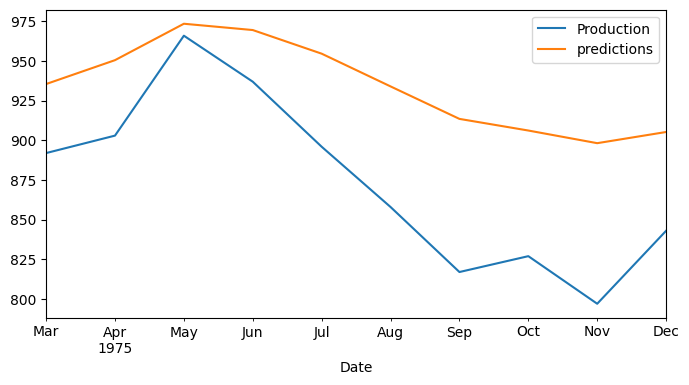

In [37]:
test.plot(figsize=(8,4))

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Production'],test['predictions']))
print(rmse)

66.50039957888916
